# Correlation function of DR72 SDSS VAGC Catalog

First import all the modules such as healpy and astropy needed for analyzing the structure

In [1]:
import healpix_util as hu
import astropy as ap
import numpy as np
from astropy.io import fits
from astropy.table import Table
import astropy.io.ascii as ascii
from astropy.io import fits
from astropy.constants import c
import matplotlib.pyplot as plt
import math as m
from math import pi
import scipy.special as sp
from scipy import integrate
import warnings
from sklearn.neighbors import BallTree
import pickle
import pymangle
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
dr7full=ascii.read("./input/DR7-Full.ascii")
dr7full

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
56.1604523761,-0.221359772462,0.4501842,-22.0970516205,0.9943343,0.310859,1.7112147,1.0,0.9901478,32763,33480,784
58.247844859,0.216329004672,0.3671646,-21.8688602448,0.9533011,0.7922078,0.9208817,1.0,0.9506173,303471,311902,3790
54.445380928,0.619974218725,0.4133244,-21.7306137085,1.0,0.4315305,1.4082278,1.0,0.9183673,43630,44552,779
54.4879828915,0.485825651457,0.3224697,-21.8775806427,1.0,0.9240486,0.8174705,1.0,0.9183673,43622,44544,779
54.4932987631,0.483249792951,0.3226457,-21.6763000488,1.0,0.9249313,0.8168564,1.0,0.9183673,43622,44544,779
55.5558858448,0.582441686132,0.2334688,-21.5131568909,0.9943343,1.0009493,0.7672175,1.0,0.9901478,43723,44650,784
55.5686146471,0.608277412471,0.3136448,-21.5073776245,0.9943343,0.8425107,0.8784812,1.0,0.9901478,43727,44654,784
55.5972002797,0.434026434704,0.3517163,-21.5829257965,0.9943343,0.8903325,0.8416406,1.0,0.9901478,43731,44658,784
55.7617273511,0.495315330472,0.403208,-21.3501148224,0.9943343,0.4957986,1.2868758,1.0,0.9901478,43740,44667,784


In [3]:
z=dr7full['col3']
rad=dr7full['col1']
decd=dr7full['col2']

In [4]:
#Ez = lambda x: 1.0/m.sqrt(0.3*(1+x)**3+0.7)
Om=0.3121
Ol=0.6879
Ok=0.0
def Ez(zv):
    return 1.0/m.sqrt(Om*(1.0+zv)**3+Ok*(1.0+zv)**2+Ol)

np.vectorize(Ez)
#Calculate comoving distance of a data point using the Redshift - This definition is based on the cosmology model we take. Here the distance for E-dS universe is considered. Also note that c/H0 ratio is cancelled in the equations and hence not taken.

In [5]:
def DC_LCDM(z):
  return integrate.quad(Ez, 0, z)[0]
DC_LCDM=np.vectorize(DC_LCDM)

In [6]:
DC_LCDM(2.0)

array(1.1971544579923434)

In [7]:
DC=DC_LCDM(z)
DC

0.400825072152
0.334358854848
0.371719971507
0.297202470943
0.297350694898
0.220295493174
0.289750863213
0.321625971389
0.363619224008
0.342331977198
0.161877291501


In [8]:
dr7f = open("./output/DR72srarfPlanck.dat",'w')
dr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dr7full)):
    dr7f.write("%f\t " %z[i])
    dr7f.write("%f\t %f\t " %(rad[i],decd[i]))
    dr7f.write("%f\t " %DC[i])
    dr7f.write("%f\t %f\n " %(rad[i]*pi/180.0,decd[i]*pi/180.0))
dr7f.close()

In [9]:
data=ascii.read("./output/DR72srarfPlanck.dat")

In [10]:
data['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [11]:
data['s']

0.400825
0.334359
0.37172
0.297202
0.297351
0.220295
0.289751
0.321626
0.363619
0.342332
0.161877


In [12]:
data['rar']

0.980185
1.016617
0.950251
0.950995
0.951087
0.969633
0.969855
0.970354
0.973226
0.974112
0.97513


In [13]:
data['decr']

-0.003863
0.003776
0.010821
0.008479
0.008434
0.010166
0.010616
0.007575
0.008645
0.009094
0.008617


In [14]:
NSIDE=512
dr72hpix=hu.HealPix("ring",NSIDE)

In [16]:
pixdata = open("./output/pixdatadr72VAGCfullPlanck.dat",'w')
pixdata.write("z\t pix \n")

for i in range(0,len(data)):
    pixdata.write("%f\t" %data['z'][i])
    pixdata.write("%d\n" %dr72hpix.eq2pix(data['ra'][i],data['dec'][i]))
pixdata.close()

In [17]:
pixdata = ascii.read("./output/pixdatadr72VAGCfullPlanck.dat")
hpixdata=np.array(np.zeros(hu.nside2npix(NSIDE)))
for j in range(len(pixdata)):
    hpixdata[pixdata[j]['pix']]+=1

In [18]:
hpixdata

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

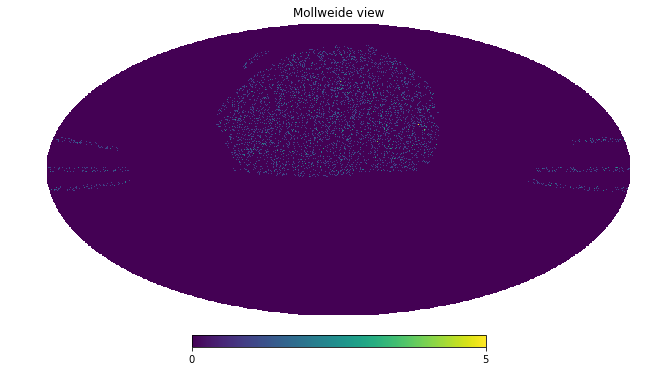

In [19]:
hu.mollview(hpixdata,rot=180)

In [ ]:
mangle=pymangle.Mangle("./masks/")

Ref: https://pypi.python.org/pypi/pymangle/

In [ ]:
%%time
rar,decr=mangle.genrand(2*len(data))

In [15]:
dataR=ascii.read("./output/rand200kdr72.dat")

In [16]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [17]:
dataR['ra']

171.460447
156.861634
135.655956
151.1135
327.045321
222.706587
132.163348
214.239217
310.627283
143.795051
168.941476


In [18]:
dataR['dec']

14.210816
40.750823
19.592957
24.245002
-7.737766
21.927202
15.281744
5.973424
1.01386
15.993848
43.319462


In [19]:
zr=np.array([data['z'],data['z']])

In [20]:
zr=zr.flatten()

In [21]:
DCr=DC_LCDM(zr)
DCr

array([ 0.40082492,  0.33435918,  0.37171965, ...,  0.33513679,
        0.20948494,  0.31777373])

In [22]:
rdr7f = open("./output/rDR72srarfPlanck.dat",'w')
rdr7f.write("z\t ra\t dec\t s\t rar\t decr \n")

for i in range(0,len(dataR)):
    rdr7f.write("%f\t " %zr[i])
    rdr7f.write("%f\t %f\t " %(dataR['ra'][i],dataR['dec'][i]))
    rdr7f.write("%f\t " %DCr[i])
    rdr7f.write("%f\t %f\n " %(dataR['ra'][i]*pi/180.0,dataR['dec'][i]*pi/180.0))
rdr7f.close()

In [23]:
dataR=ascii.read("./output/rDR72srarfPlanck.dat")

In [24]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [25]:
dat=ascii.read("./output/DR72srarfPlanck.dat")

In [26]:
dat=np.array([dat['s'],dat['rar'],dat['decr']])

In [27]:
dat.reshape(3,len(data['s']))

array([[ 0.400825,  0.334359,  0.37172 , ...,  0.335136,  0.209485,
         0.317774],
       [ 0.980185,  1.016617,  0.950251, ...,  2.830242,  2.831786,
         2.838233],
       [-0.003863,  0.003776,  0.010821, ...,  0.172112,  0.173661,
         0.173055]])

In [28]:
dat=dat.transpose()

In [29]:
dat

array([[ 0.400825,  0.980185, -0.003863],
       [ 0.334359,  1.016617,  0.003776],
       [ 0.37172 ,  0.950251,  0.010821],
       ..., 
       [ 0.335136,  2.830242,  0.172112],
       [ 0.209485,  2.831786,  0.173661],
       [ 0.317774,  2.838233,  0.173055]])

In [30]:
from lcdmmetric import *

In [31]:
LCDMmetricsq(dat[0],dat[1])

0.004603410216694359

In [32]:
bins=np.arange(0.005,0.08,0.0025)

In [33]:
print bins

[ 0.005   0.0075  0.01    0.0125  0.015   0.0175  0.02    0.0225  0.025
  0.0275  0.03    0.0325  0.035   0.0375  0.04    0.0425  0.045   0.0475
  0.05    0.0525  0.055   0.0575  0.06    0.0625  0.065   0.0675  0.07
  0.0725  0.075   0.0775]


In [34]:
Nbins=len(bins)

In [35]:
Nbins

30

In [36]:
%%time
BT_D = BallTree(dat,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTDdr72Planck.pkl', 'w') as f:
    pickle.dump(BT_D,f)

CPU times: user 4.66 s, sys: 40.4 ms, total: 4.7 s
Wall time: 4.76 s


In [37]:
with open('./BTDdr72Planck.pkl') as f:
    BTD = pickle.load(f)
    
BTD

In [38]:
binsq=bins**2
binsq

array([  2.50000000e-05,   5.62500000e-05,   1.00000000e-04,
         1.56250000e-04,   2.25000000e-04,   3.06250000e-04,
         4.00000000e-04,   5.06250000e-04,   6.25000000e-04,
         7.56250000e-04,   9.00000000e-04,   1.05625000e-03,
         1.22500000e-03,   1.40625000e-03,   1.60000000e-03,
         1.80625000e-03,   2.02500000e-03,   2.25625000e-03,
         2.50000000e-03,   2.75625000e-03,   3.02500000e-03,
         3.30625000e-03,   3.60000000e-03,   3.90625000e-03,
         4.22500000e-03,   4.55625000e-03,   4.90000000e-03,
         5.25625000e-03,   5.62500000e-03,   6.00625000e-03])

In [39]:
%%time
counts_DD=BTD.two_point_correlation(dat,binsq)
print counts_DD

[   408547    788300   1393246   2290478   3546836   5226849   7405446
  10142866  13520295  17594645  22453754  28171185  34809136  42435348
  51094665  60837704  71736093  83823261  97141984 111691953 127535863
 144733147 163299520 183242654 204573919 227362618 251645350 277418723
 304716606 333599277]
CPU times: user 21min 38s, sys: 1.13 s, total: 21min 39s
Wall time: 21min 40s


In [40]:
with open('./DDDr72Planck.pkl', 'w') as f:
    pickle.dump(counts_DD,f)

with open('./DDDr72Planck.pkl') as f:
    counts_DD = pickle.load(f)
    
counts_DD

array([   408547,    788300,   1393246,   2290478,   3546836,   5226849,
         7405446,  10142866,  13520295,  17594645,  22453754,  28171185,
        34809136,  42435348,  51094665,  60837704,  71736093,  83823261,
        97141984, 111691953, 127535863, 144733147, 163299520, 183242654,
       204573919, 227362618, 251645350, 277418723, 304716606, 333599277])

In [41]:
DD=np.diff(counts_DD)
DD

array([  379753,   604946,   897232,  1256358,  1680013,  2178597,
        2737420,  3377429,  4074350,  4859109,  5717431,  6637951,
        7626212,  8659317,  9743039, 10898389, 12087168, 13318723,
       14549969, 15843910, 17197284, 18566373, 19943134, 21331265,
       22788699, 24282732, 25773373, 27297883, 28882671])

In [42]:
dataR=ascii.read("./output/rDR72srarfPlanck.dat")

In [43]:
dataR['z']

0.450184
0.367165
0.413324
0.32247
0.322646
0.233469
0.313645
0.351716
0.403208
0.37691
0.168714


In [44]:
datR=np.array([dataR['s'],dataR['rar'],dataR['decr']])

In [45]:
datR.reshape(3,len(dataR['s']))

array([[ 0.400825,  0.334359,  0.37172 , ...,  0.309361,  0.335137,
         0.209485],
       [ 2.992549,  2.737752,  2.367643, ...,  3.228052,  3.218296,
         4.056418],
       [ 0.248026,  0.711236,  0.341962, ...,  0.199013,  0.052979,
         0.170602]])

In [46]:
datR=datR.transpose()

In [47]:
datR

array([[ 0.400825,  2.992549,  0.248026],
       [ 0.334359,  2.737752,  0.711236],
       [ 0.37172 ,  2.367643,  0.341962],
       ..., 
       [ 0.309361,  3.228052,  0.199013],
       [ 0.335137,  3.218296,  0.052979],
       [ 0.209485,  4.056418,  0.170602]])

In [48]:
LCDMmetricsq(datR[0],datR[1])

0.03901801805047278

In [49]:
%%time
BT_R = BallTree(datR,metric='pyfunc',func=LCDMmetricsq,leaf_size=15) 

with open('BTRdr72Planck.pkl', 'w') as f:
    pickle.dump(BT_R,f)

CPU times: user 9.68 s, sys: 62.7 ms, total: 9.74 s
Wall time: 9.84 s


In [50]:
with open('./BTRdr72Planck.pkl') as f:
    BTR = pickle.load(f)
    
BTR

In [51]:
%%time
counts_RR=BTR.two_point_correlation(datR,binsq)
print counts_RR

[    676682    1733154    3716985    6897855   11517432   17826925
   26085318   36585655   49667075   65610819   84713449  107231212
  133374104  163426339  197542991  235937159  278794689  326252634
  378456039  435564504  497727176  565118775  637833161  715984198
  799627323  888878096  983775148 1084298708 1190658067 1302843547]
CPU times: user 1h 14min 26s, sys: 4.9 s, total: 1h 14min 31s
Wall time: 1h 22min 23s


In [52]:
with open('./RRDr72Planck.pkl', 'w') as f:
    pickle.dump(counts_RR,f)

with open('./RRDr72Planck.pkl') as f:
    counts_RR = pickle.load(f)
    
counts_RR

array([    676682,    1733154,    3716985,    6897855,   11517432,
         17826925,   26085318,   36585655,   49667075,   65610819,
         84713449,  107231212,  133374104,  163426339,  197542991,
        235937159,  278794689,  326252634,  378456039,  435564504,
        497727176,  565118775,  637833161,  715984198,  799627323,
        888878096,  983775148, 1084298708, 1190658067, 1302843547])

In [53]:
RR=np.diff(counts_RR)
RR

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.

array([  1056472,   1983831,   3180870,   4619577,   6309493,   8258393,
        10500337,  13081420,  15943744,  19102630,  22517763,  26142892,
        30052235,  34116652,  38394168,  42857530,  47457945,  52203405,
        57108465,  62162672,  67391599,  72714386,  78151037,  83643125,
        89250773,  94897052, 100523560, 106359359, 112185480])

In [54]:
%%time
counts_DR=BTR.two_point_correlation(dat,binsq)
print counts_DR

[   227954    753329   1747905   3337083   5652958   8816896  12968409
  18258543  24849377  32906615  42556240  53924227  67124071  82309607
  99558839 118944829 140604387 164612024 191069013 219968289 251444059
 285567865 322378827 361968526 404350074 449634534 497881475 548954582
 602968215 659853268]
CPU times: user 36min 28s, sys: 1.64 s, total: 36min 29s
Wall time: 36min 31s


In [55]:
with open('./DRDr72Planck.pkl', 'w') as f:
    pickle.dump(counts_DR,f)

with open('./DRDr72Planck.pkl') as f:
    counts_DR = pickle.load(f)
    
counts_DR

array([   227954,    753329,   1747905,   3337083,   5652958,   8816896,
        12968409,  18258543,  24849377,  32906615,  42556240,  53924227,
        67124071,  82309607,  99558839, 118944829, 140604387, 164612024,
       191069013, 219968289, 251444059, 285567865, 322378827, 361968526,
       404350074, 449634534, 497881475, 548954582, 602968215, 659853268])

In [56]:
DR=np.diff(counts_DR)
DR

array([  525375,   994576,  1589178,  2315875,  3163938,  4151513,
        5290134,  6590834,  8057238,  9649625, 11367987, 13199844,
       15185536, 17249232, 19385990, 21659558, 24007637, 26456989,
       28899276, 31475770, 34123806, 36810962, 39589699, 42381548,
       45284460, 48246941, 51073107, 54013633, 56885053])

In [57]:
from __future__ import division
correl=(4.0*DD-4.0*DR+1.0*RR)/(1.0*RR)

In [58]:
correl

array([ 0.44864795,  0.21438873,  0.12986573,  0.08258527,  0.05924295,
        0.04440682,  0.02756873,  0.01741401,  0.00076469, -0.0031113 ,
       -0.00375086, -0.00400415, -0.00615798, -0.00712286, -0.00462664,
       -0.0043667 , -0.00471851, -0.00669801, -0.0050564 , -0.00586796,
       -0.00466659, -0.00363023, -0.005569  , -0.00667128, -0.00820465,
       -0.01011395, -0.00671858, -0.00473528,  0.0015684 ])

In [59]:
binMpc=c*1e-5*bins[1:len(bins)]
print binMpc

[  22.48443435   29.9792458    37.47405725   44.9688687    52.46368015
   59.9584916    67.45330305   74.9481145    82.44292595   89.9377374
   97.43254885  104.9273603   112.42217175  119.9169832   127.41179465
  134.9066061   142.40141755  149.896229    157.39104045  164.8858519
  172.38066335  179.8754748   187.37028625  194.8650977   202.35990915
  209.8547206   217.34953205  224.8443435   232.33915495] m / s


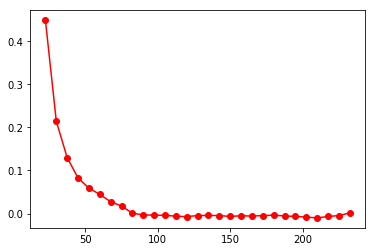

In [60]:
plt.plot(binMpc,correl,'ro-')

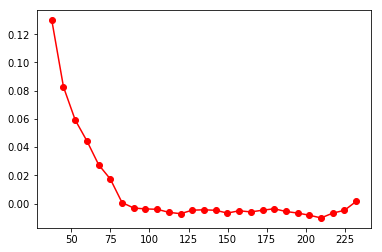

In [65]:
plt.plot(binMpc[2:],correl[2:],'ro-')

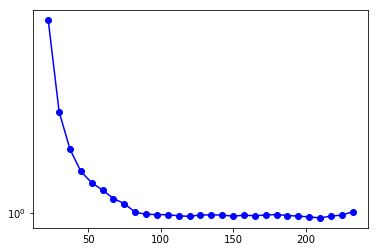

In [63]:
plt.yscale('log')
plt.plot(binMpc,correl+1.0,'bo-')
plt.show()

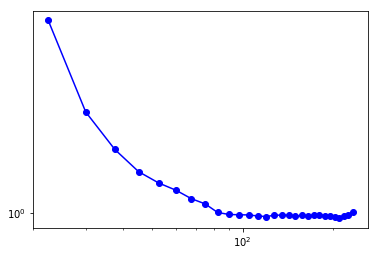

In [64]:
plt.xscale('log')
plt.yscale('log')
plt.plot(binMpc,correl+1.0,'bo-')
plt.show()